# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 11: Clustering, Topic Modeling and Recommendation Engines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

## Today:

- ML Overview
- Clustering
- Hierarchical Agglomerative Clustering (HAC)
- k-Means
- Topic Modeling: Latent Dirichlet Allocation (LDA)
- Recommendation Engines

# Overview: General Types of ML

### Supervised Learning: $\{(x,y)\}_L$

- Classification: $y \in \{0,1,\ldots\}$

- Regression: $y \in \mathbb{R}$

- Semi-Supervised Learning: $\{(x,y)\}_L + \{x\}_U$

- Reinforcement Learning: States, Actions and Rewards

### Unsupervised Learning: $\{x\}_U$

- Dimensionality Reduction

- Anomaly/Novelty Detection

- **Clustering**: $\{x\}_U$

# Clustering

- Group $X$ into $k$ clusters

- Many ways to do it: **k-Means**, **HAC**, Spectral, ...

<img src="./images/sphx_glr_plot_cluster_comparison_0011.png">

from http://www.statisticshowto.com/wp-content/uploads/2013/09/standard-normal-distribution.jpg

## Why do clustering?

- exploratory data analysis

- group media: images, music, news articles, ...

- social networks: users, groups, ...

- marketing: consumer populations, ...

- science: gene families, psychological groups, ...

- image segmentation

- ...

## Hierarchical Agglomerative Clustering

- very simple

- don't have to specify the number of clusters up front

- generates binary tree over the dataset

### Example in 2D

- Initially, every point is its own cluster

- Find the pair that are closest

- Merge them into a single cluster

- Repeat, until the entire dataset is one big cluster

<img src='./images/hac_1.png'>

### Important: How to measure closeness between two clusters?

Have to choose a **distance metric** and a **linkage criteria**.

Have to choose a **distance metric**:

- Euclidean
- Manhattan or taxicab
- Cosine
- ...

Have to choose a **linkage** createria:

- **single**: *shortest distance* from member of one cluster to member of the other

- **complete**: *greatest distance* from member of one cluster to member of the other

- **average**: *average distance* of members of one cluster to members of the other

- **ward**: minimize sum of squared differences between all clusters (only euclidean metric)

#### Example: clustering loans

In [25]:
df = pd.read_csv('../data/loan200.csv')
X = df[['payment_inc_ratio','dti']].values

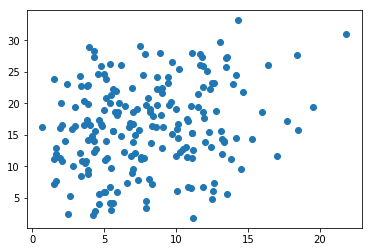

In [28]:
_ = plt.scatter(X[:,0],X[:,1])

## Result is a dendrogram

In [34]:
from scipy.cluster import hierarchy

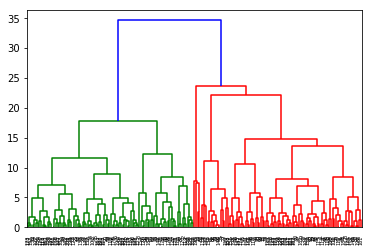

In [35]:
Z = hierarchy.linkage(X,'complete')
_ = hierarchy.dendrogram(Z)

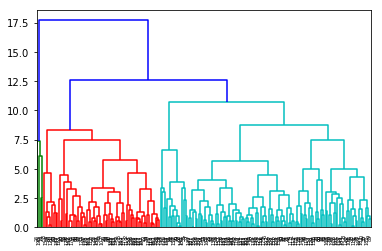

In [46]:
Z = hierarchy.linkage(X,'average')
_ = hierarchy.dendrogram(Z)

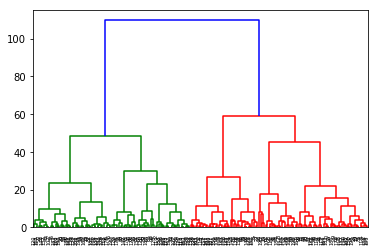

In [47]:
Z = hierarchy.linkage(X,'ward')
_ = hierarchy.dendrogram(Z)

### Using sklearn

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
hac = AgglomerativeClustering(linkage='complete', n_clusters=2)

In [55]:
c = hac.fit_predict(X)

In [56]:
def plot_clusters(X,c):
    fig = plt.figure(figsize=(6,6))
    for i in range(np.max(c) + 1):
        cluster = X[c == i]
        _ = plt.scatter(cluster[:,0],cluster[:,1])

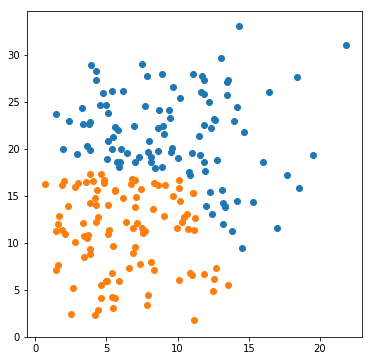

In [57]:
plot_clusters(X,c) # 2 clusters, complete linkage

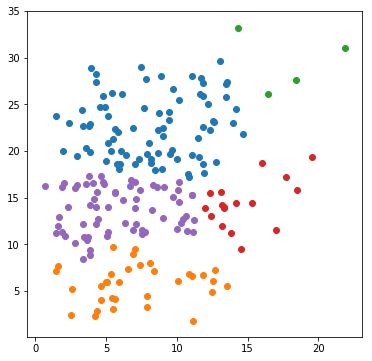

In [67]:
c = AgglomerativeClustering(n_clusters=5, linkage='complete').fit_predict(X)
plot_clusters(X,c)

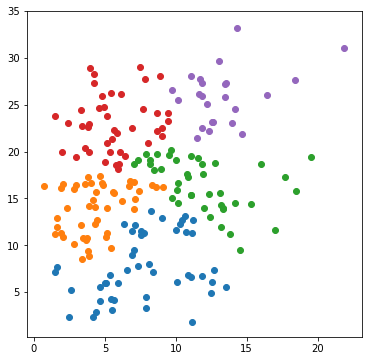

In [66]:
c = AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(X)
plot_clusters(X,c)

## How to evaluate?

- use external data: are there any labels? how pure are the clusters?

- otherwise, it's tough

- for k-means: explanation of variance

- others, see sklearn documentation

# k-Means

- not to be confused with k-NN!

- have to specify the number of clusters k

- an iterative method

#### How it works

- choose initial k means

A. fix means -> assign all points to thier closest mean

B. fix assignments -> recalculate means

Repeat till convergence!

## Example in 2d

In [68]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5)
c = km.fit_predict(X)

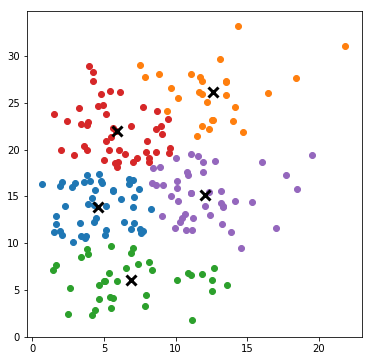

In [81]:
plot_clusters(X,c)
for m in km.cluster_centers_:
    plt.gca().plot(m[0],m[1], marker='x',c='k', ms=10, mew=3)

### Things you need to define

- number of clusters k

- initial locations of means

- distance metric

### Choosing K

- one way: using elbow in the sum of squared errors

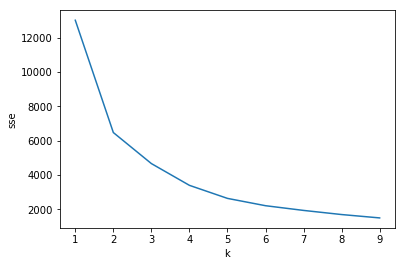

In [86]:
sse = []
for i in range(1,10):
    sse.append(KMeans(n_clusters=i).fit(X).inertia_)

_ = plt.plot(range(1,10),sse); _ = plt.xlabel('k'); _ = plt.ylabel('sse')

## See LDA Slides

## Recommendation Engines

- Spotify
- Netflix
- Amazon
- ....


Objective: produced a ranked list of items

### Types of recommender systems

- Collaborative Filtering

- Content-Based

- Knowledge-Based (uses domain knowledge)

- Hybrid and Ensemble

### Collaborative Filtering

- If both you and I like MovieA, and you like MovieB, I'll probably like movie A

- Use similarity of user preferences to recommend items

- Matrix: Users x Items
- Values: Rankings

#### Issues with Collaborative

- the cold start problem

- sparcity

### Content-Based

- If I like product A, and product B is like product A, I'll probably like product B

- Use similarity of items to recommend items

- Matrix: Items x Items
- Values: Similarity of Items

#### Issues with content-based

- need to discover the important features

- these may vary between users and change over time

### Evaluation

- **Precision@N** : Out of top N, how many were true

- **Recall@N** : Out of all true, how many were in top N

for more see: Recommender Systems by Charu C. Aggarwal